In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('Sales_data_zone_wise.csv')

In [4]:
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [6]:
df.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


● The mean sales generated by each zone.

In [9]:
df.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


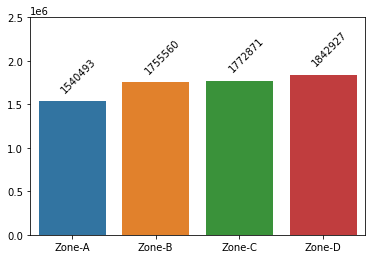

In [20]:
a=df.mean()
plt.ylim(0,2500000)
b= sns.barplot(x=['Zone-A','Zone-B','Zone-C','Zone-D'],y=a, data=df)
for p in b.patches:
    b.annotate(round(p.get_height()) , (p.get_x()+0.25, p.get_height()+100000),rotation=45)
plt.show()

● Total sales generated by all the zones for each month.


In [21]:
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


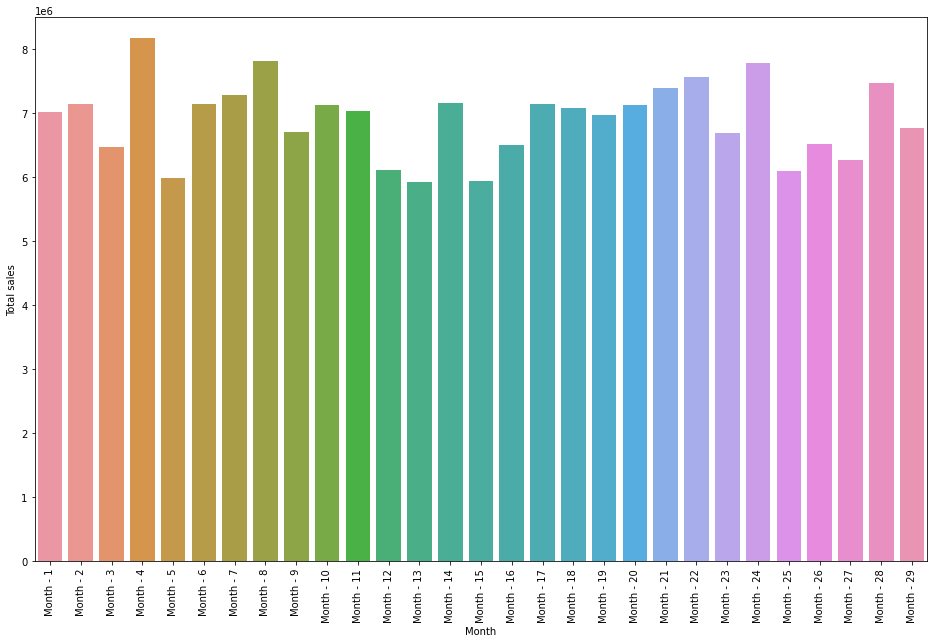

In [52]:
total_sales=df['Zone - A']+df['Zone - B']+df['Zone - C']+df['Zone - D']
plt.figure(figsize=(16,10))
plt.ylim(0,8500000)
plt.xticks(rotation=90)
sns.barplot(x='Month',y=total_sales,data=df)
plt.ylabel('Total sales')
plt.xlabel('Month')
plt.show()

In [60]:
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D,total sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328


In [63]:
df['total sales'].max()

8174449

In [64]:
df['total sales'].min()

5925424

In [66]:
df.loc[:,['Month','total sales']]

,Month,total sales
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328
5,Month - 6,7151387
6,Month - 7,7287108
7,Month - 8,7816299
8,Month - 9,6703395
9,Month - 10,7128210


● Check whether all the zones generate the same amount of sales.


In [68]:
# One way anova can be done
# H0 = All zones generate same amount of sales
# H1 = Atleast one zone is different from others sales
# alpha = 0.05

In [69]:
f_stats,p_value = stats.f_oneway(df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - C'])

In [70]:
print(f_stats,p_value)

4.692425657964066 0.003995600663996626


In [74]:
if (p_value<=0.05):
    print(p_value,"","Since p value is less than 0.05 we reject the null hypothesis","\n Thus all zones have difference in the sales")
else:
    print(p_value,"","Since p value is greater than 0.05 we accept the null hypothesis")

0.003995600663996626  Since p value is less than 0.05 we reject the null hypothesis 
 Thus all zones have difference in the sales
